Felipe Piovan - RA00319594
Gabriel Bento - RA00320082
Paulo Cesar - RA00274417
Edgard Ramos - RA00320141


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***Clusterização***

In [19]:
import pandas as pd

data = pd.read_csv('steam.csv')


data.head()


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [20]:
import pandas as pd


columns_to_drop = ['appid', 'release_date', 'english', 'developer', 'publisher',
                   'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
                   'achievements', 'average_playtime', 'median_playtime', 'owners', 'name']
data = data.drop(columns=columns_to_drop)



print(data.head())




   positive_ratings  negative_ratings  price
0            124534              3339   7.19
1              3318               633   3.99
2              3416               398   3.99
3              1273               267   3.99
4              5250               288   3.99


In [21]:
data.head()

,positive_ratings,negative_ratings,price
0,124534,3339,7.19
1,3318,633,3.99
2,3416,398,3.99
3,1273,267,3.99
4,5250,288,3.99


In [22]:
from sklearn.preprocessing import StandardScaler

# Padronizando os dados usando o método Z-score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

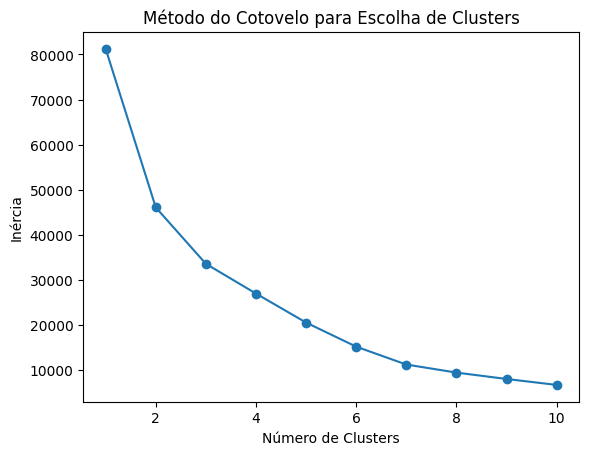

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escolhendo o número de clusters usando o método Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha de Clusters')
plt.show()


In [33]:
# Segmentação com K-Means (k=3)
kmeans = KMeans(n_clusters=5, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


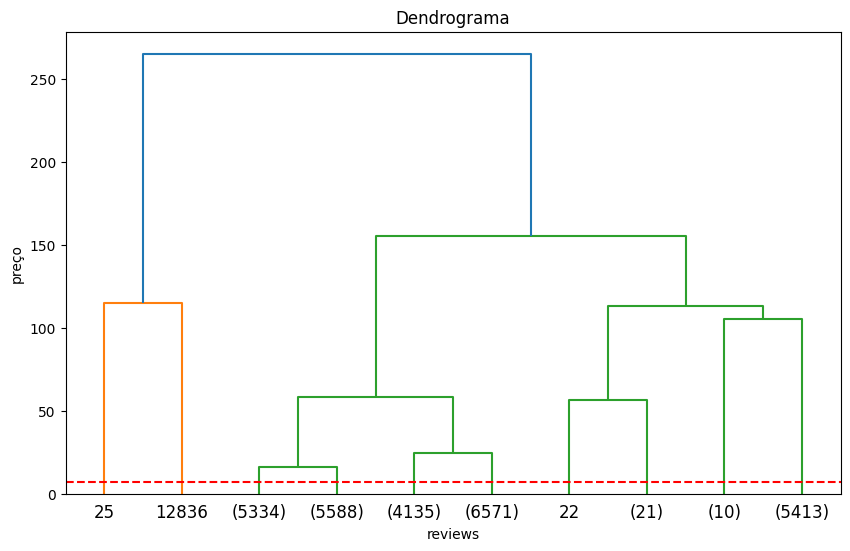

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage  # Importar a função linkage



# Calcular a matriz de linkage
linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrograma')
plt.xlabel('reviews')
plt.ylabel('preço')
plt.axhline(y=7, color='r', linestyle='--')
plt.show()


In [32]:
from scipy.cluster.hierarchy import linkage, fcluster

# Supondo que você tenha os dados em 'data' e defina a distância e o método de ligação
# Aqui, `method` pode ser 'single', 'complete', 'average', entre outros
linkage_matrix = linkage(data[selected_columns], method='ward', metric='euclidean')

# Escolhendo o número de clusters com base na análise do dendrograma
num_clusters_hierarchical = 5  # Escolha o número de clusters com base na análise do dendrograma

# Realizando a segmentação hierárquica
hierarchical_clusters = fcluster(linkage_matrix, t=num_clusters_hierarchical, criterion='maxclust')

# Adicionando os clusters à coluna do DataFrame
data['hierarchical_cluster'] = hierarchical_clusters


In [34]:
from sklearn.metrics import silhouette_score

# Supondo que data_scaled contém os dados escalonados
# E data['kmeans_cluster'] e data['hierarchical_cluster'] contêm os rótulos dos clusters atribuídos

# Avaliação do K-Means
kmeans_silhouette = silhouette_score(data_scaled, data['kmeans_cluster'])
print(f"Silhueta do K-Means: {kmeans_silhouette}")

# Avaliação do Método Hierárquico
hierarchical_silhouette = silhouette_score(data_scaled, data['hierarchical_cluster'])
print(f"Silhueta do Método Hierárquico: {hierarchical_silhouette}")


Silhueta do K-Means: 0.7122511150598579
Silhueta do Método Hierárquico: 0.8838263464582568


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

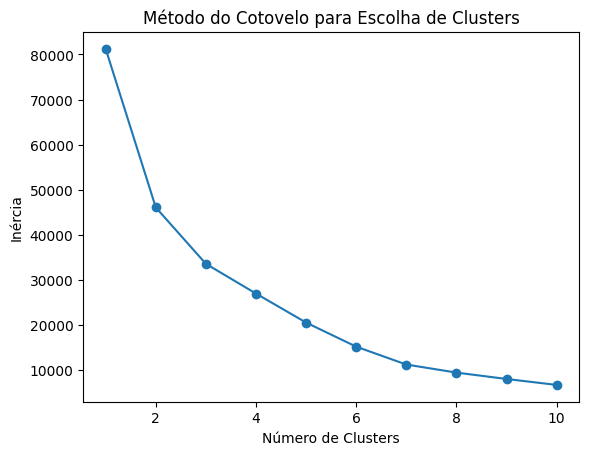

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escolhendo o número de clusters usando o método Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha de Clusters')
plt.show()


In [16]:
data.head()

,positive_ratings,negative_ratings,price,kmeans_cluster
0,124534,3339,7.19,0
1,3318,633,3.99,0
2,3416,398,3.99,0
3,1273,267,3.99,0
4,5250,288,3.99,0


In [27]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Carregando os dados do arquivo CSV
data = pd.read_csv('steam.csv')

# Restante do seu código para aplicar o DBSCAN e realizar a análise
selected_columns = ['positive_ratings', 'negative_ratings', 'price']
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(data[selected_columns])
data['Cluster_DBSCAN'] = clusters_dbscan

print("\nResultados do Método DBSCAN:")
print(data.groupby('Cluster_DBSCAN').mean())



Resultados do Método DBSCAN:
                        appid   english  required_age  achievements  \
Cluster_DBSCAN                                                        
-1              529163.042437  0.981256      0.457010     56.926078   
 0              509975.714286  1.000000      0.000000      7.285714   
 1              598524.000000  1.000000      0.000000      6.400000   
 2              484735.000000  1.000000      0.000000     17.666667   
 3              636041.666667  1.000000      0.000000     15.166667   
...                       ...       ...           ...           ...   
 596            932248.000000  1.000000      0.000000      6.400000   
 597            948044.666667  0.800000      1.066667      2.400000   
 598            907486.000000  1.000000      0.000000     12.600000   
 599            908193.750000  1.000000      0.000000     17.250000   
 600            974543.750000  1.000000      0.000000     28.750000   

                positive_ratings  negative_rat

<ipython-input-27-ac496dde0fb8>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('Cluster_DBSCAN').mean())


# ***Anánlise exploratória***

In [15]:
df = pd.read_csv('steamm.csv')

In [16]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

    year  price
0   1997  $5.99
1   1998  $7.19
2   1999  $3.99
3   2000  $5.59
4   2001  $2.00
5   2002  $7.99
6   2003  $2.99
7   2004  $5.76
8   2005  $4.03
9   2006  $7.56
10  2007  $5.63
11  2008  $6.54
12  2009  $6.99
13  2010  $7.39
14  2011  $7.53
15  2012  $8.59
16  2013  $8.69
17  2014  $7.46
18  2015  $6.42
19  2016  $5.89
20  2017  $5.89
21  2018  $5.57
22  2019  $6.19


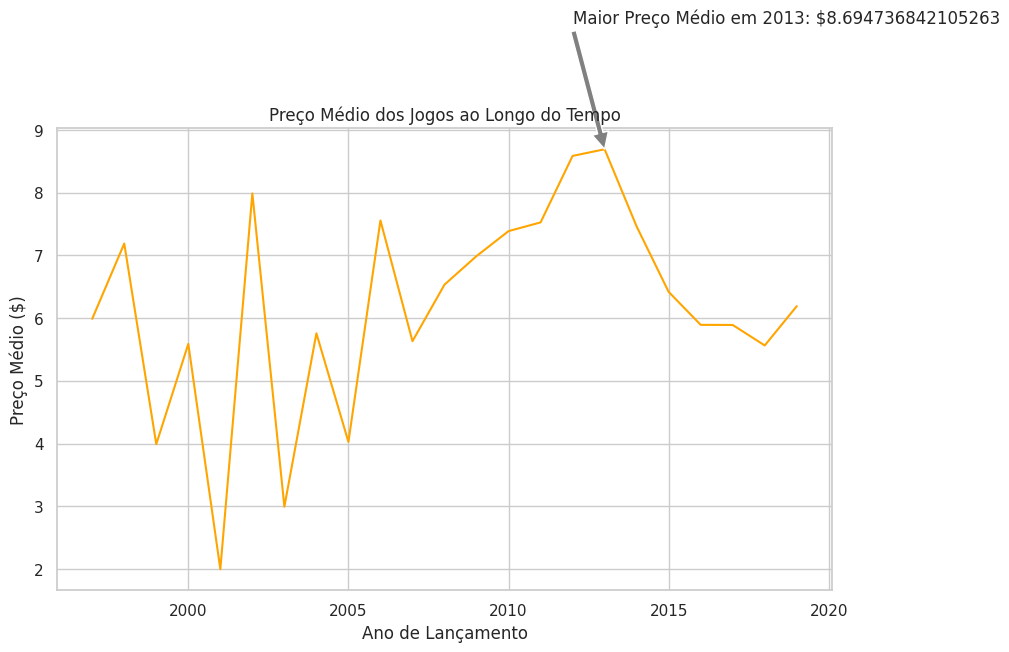

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

price_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=price_by_year, x='year', y='price', color='orange')

plt.xlabel('Ano de Lançamento')
plt.ylabel('Preço Médio ($)')
plt.title('Preço Médio dos Jogos ao Longo do Tempo')


max_price_year = price_by_year.loc[price_by_year['price'].idxmax(), 'year']
max_price = price_by_year['price'].max()

plt.annotate(f'Maior Preço Médio em {int(max_price_year)}: ${max_price}',
             xy=(max_price_year, max_price),
             xytext=(max_price_year-1, max_price+2),
             arrowprops=dict(facecolor='grey'))

price_by_year['price'] = price_by_year['price'].apply(lambda x: '${:.2f}'.format(x))
print(price_by_year)

sns.set(style='whitegrid')

plt.show()


                                               publisher  positive_ratings
8755                                    PUBG Corporation     496184.000000
10816                              Smartly Dressed Games     292574.000000
9406                                       Psyonix, Inc.     242561.000000
3208                                    Digital Extremes     226541.000000
12625                                              Valve     175689.066667
11313                                    Studio Wildcard     145035.000000
9691                                            Re-Logic     128107.000000
11063  Square Enix;Feral interactive (Mac);Feral Inte...     118634.000000
2474                                        ConcernedApe     118217.000000
3718                                  Endnight Games Ltd     110460.000000


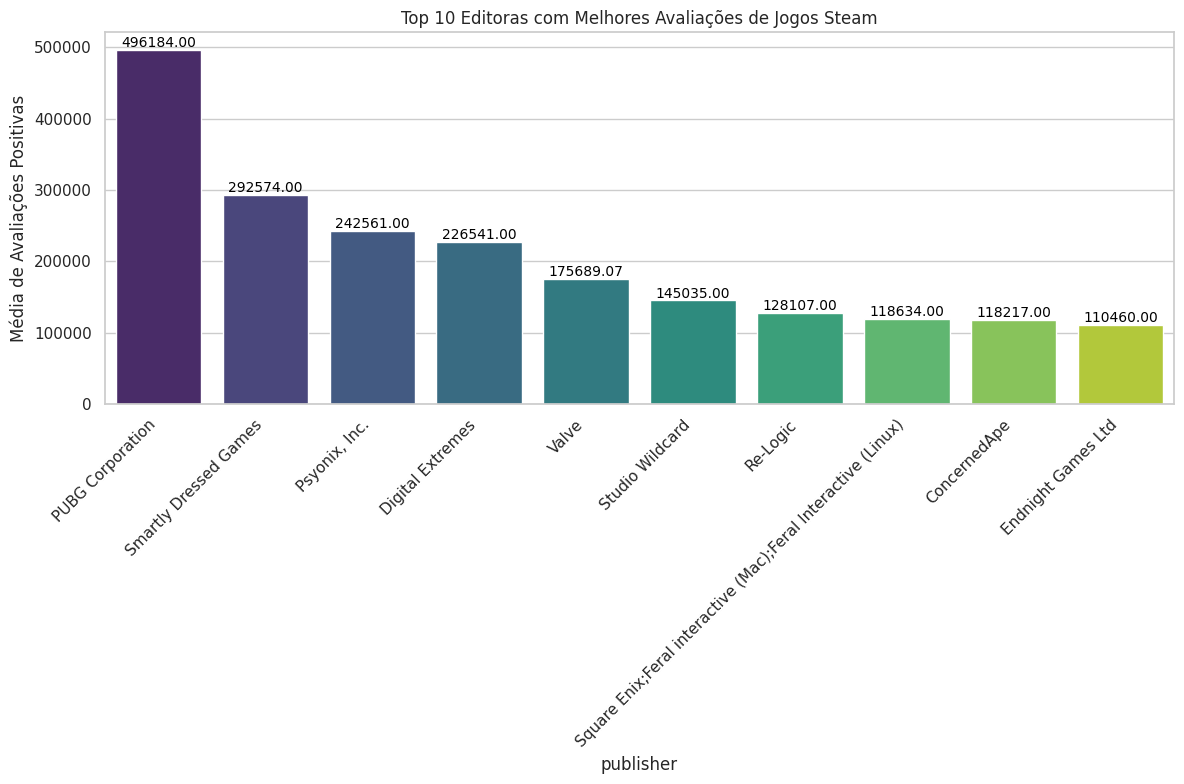

In [18]:


def top_publishers_by_ratings(df, top_n=10):

    df = df[df['publisher'].notnull()]


    publisher_ratings = df.groupby('publisher')['positive_ratings'].mean().reset_index()


    publisher_ratings = publisher_ratings.sort_values('positive_ratings', ascending=False)


    print(publisher_ratings.head(top_n))

    return publisher_ratings.head(top_n)

def plot_top_publishers_bar_chart(publisher_ratings_df):
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='publisher', y='positive_ratings', data=publisher_ratings_df, palette='viridis')

    ax.set_ylabel('Média de Avaliações Positivas')
    ax.set_title('Top 10 Editoras com Melhores Avaliações de Jogos Steam')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()


top_publishers = top_publishers_by_ratings(df)
plot_top_publishers_bar_chart(top_publishers)


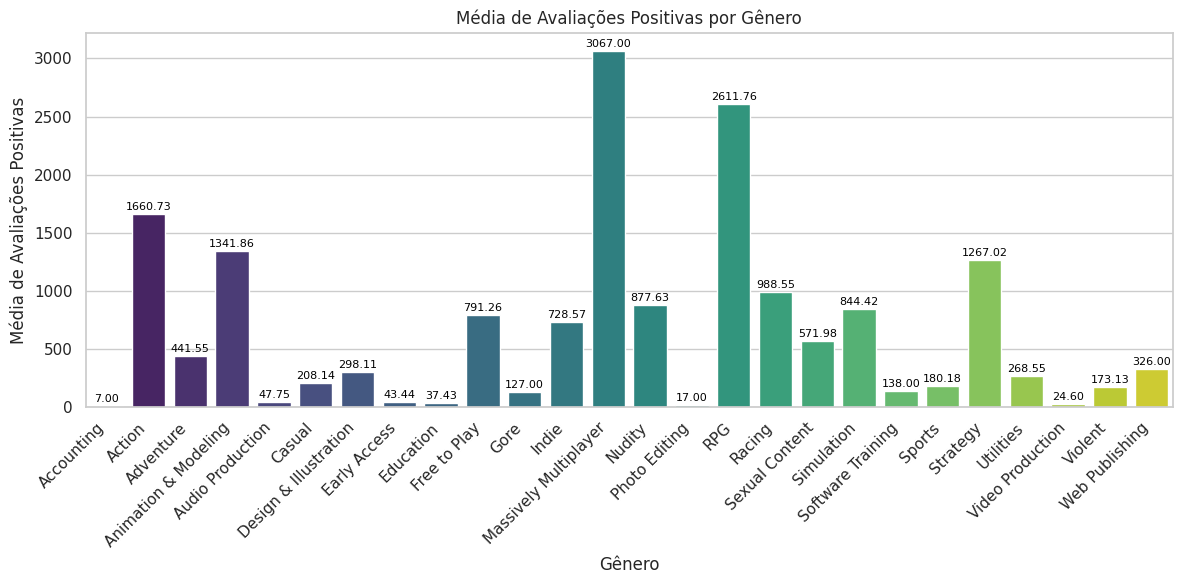

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que 'df' seja o DataFrame que contém os dados

def create_genre_column(df):
    # Cria a coluna 'genre' a partir da lista de gêneros
    df['genre'] = df['genres'].apply(lambda x: x.split(';')[0])
    return df

def calculate_average_genre_scores(df):
    # Calcula a média das avaliações positivas para cada gênero
    genre_scores = df.groupby('genre')['positive_ratings'].mean().reset_index()
    return genre_scores

def plot_average_genre_scores(genre_scores_df):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='genre', y='positive_ratings', data=genre_scores_df, palette='viridis')

    ax.set_title('Média de Avaliações Positivas por Gênero')
    ax.set_xlabel('Gênero')
    ax.set_ylabel('Média de Avaliações Positivas')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Adiciona os valores nas barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Chamada das funções
df = create_genre_column(df)
genre_scores = calculate_average_genre_scores(df)
plot_average_genre_scores(genre_scores)


In [37]:
df2 = pd.read_csv('scores.csv')

In [38]:
df2.head()

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,"4,529","19,807",227,227,96.39%
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,"168,191","61,752","1,616","1,616",95.75%
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,"15,543","12,643",213,213,95.54%
3,3,Pineapple on pizza,/app/2263010/,Mar 28 2023,"1,415","11,717",209,209,95.39%
4,4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,"6,132","14,152",324,324,95.09%


In [39]:
# Verificando as colunas existentes no DataFrame df3
print(df2.columns)


Index(['Unnamed: 0', 'game', 'link', 'release', 'peak_players',
       'positive_reviews', 'negative_reviews', 'total_reviews', 'rating'],
      dtype='object')


In [40]:
df3 = df2[:1000]

In [41]:


# Lista das colunas a serem removidas
columns_to_drop = ['game', 'Unnamed: 0', 'link', 'release']

# Removendo múltiplas colunas de uma vez
df3 = df3.drop(columns_to_drop, axis=1)


In [42]:


# Alterar tipos de dados das colunas especificadas e remover caracteres indesejados
df3['positive_reviews'] = df3['positive_reviews'].str.replace(',', '').astype(float)
df3['negative_reviews'] = df3['negative_reviews'].str.replace(',', '').astype(float)
df3['peak_players'] = df3['peak_players'].str.replace(',', '').astype(float)
df3['rating'] = df3['rating'].str.replace('%', '').astype(float)


In [43]:
df3.shape

(1000, 5)

In [44]:
# Suponha que 'df3' seja o DataFrame que contém os dados

# Corrigir a coluna 'total_reviews'
df3['total_reviews'] = df3['positive_reviews'] + df3['negative_reviews']


In [45]:
df3.head()

,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,4529.0,19807.0,227.0,20034.0,96.39
1,168191.0,61752.0,1616.0,63368.0,95.75
2,15543.0,12643.0,213.0,12856.0,95.54
3,1415.0,11717.0,209.0,11926.0,95.39
4,6132.0,14152.0,324.0,14476.0,95.09


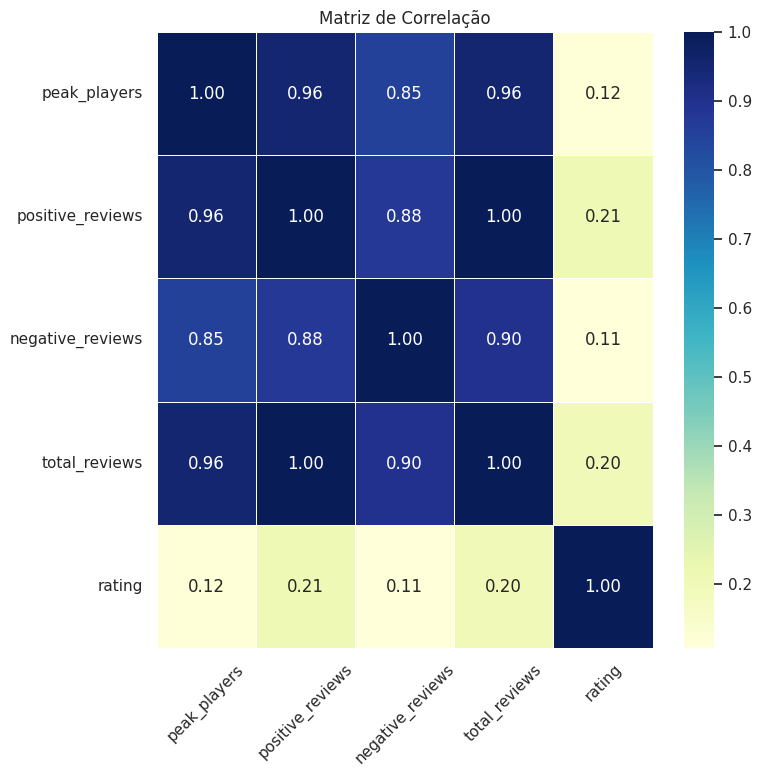

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculando a matriz de correlação
corr = df3.corr()

# Estilizando o gráfico da matriz de correlação
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt='.2f', linewidths=.5)

plt.title('Matriz de Correlação')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


# ***Random forest***

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd



# Separando os dados em features (x) e target (y)
x = df3.drop(['rating'], axis=1)
y = df3['rating']

# Dividindo os dados em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

# Treinando um modelo RandomForestRegressor nos dados de treino
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Fazendo previsões nos dados de treino
training_data_pred = model.predict(x_train)
r2_train = metrics.r2_score(y_train, training_data_pred)
print(f"R squared value (Training Data): {r2_train}")

# Fazendo previsões nos dados de teste
test_data_pred = model.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_pred)
print(f"R squared value (Test Data): {r2_test}")


R squared value (Training Data): 0.9695749428026805
R squared value (Test Data): 0.799296380824628


# ***GaussianNB***

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix



# Criar faixas para classificar os ratings como 'Baixos', 'Médios' ou 'Altos'
bins = [0, 70, 80, 100]
labels = ['Baixos', 'Médios', 'Altos']
df3['rating_category'] = pd.cut(df3['rating'], bins=bins, labels=labels)

# Separar os dados em features (x) e target (y)
x = df3.drop(['rating', 'rating_category'], axis=1)  # Features
y = df3['rating_category']  # Target

# Dividir os dados em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inicializar e treinar o classificador Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Fazer previsões nos dados de teste
y_pred = nb_classifier.predict(x_test)

# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Elaborar e imprimir a matriz de confusão
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print("Matriz de Confusão:")
print(conf_df)


Matriz de Confusão:
        Baixos  Médios  Altos
Baixos       0       0      0
Médios       0     114      3
Altos        0      74      9


In [61]:
print(y_train.unique())


['Alto']
Categories (3, object): ['Baixo' < 'Médio' < 'Alto']


In [70]:
df3.head(10)

,peak_players,positive_reviews,negative_reviews,total_reviews,rating,rating_category
0,4529.0,19807.0,227.0,20034.0,96.39,Alto
1,168191.0,61752.0,1616.0,63368.0,95.75,Alto
2,15543.0,12643.0,213.0,12856.0,95.54,Alto
3,1415.0,11717.0,209.0,11926.0,95.39,Alto
4,6132.0,14152.0,324.0,14476.0,95.09,Alto
5,8672.0,8891.0,165.0,9056.0,95.08,Alto
6,8564.0,5129.0,81.0,5210.0,94.76,Alto
7,1227.0,1832.0,20.0,1852.0,93.84,Alto
8,338.0,1917.0,27.0,1944.0,93.64,Alto
9,195.0,1166.0,10.0,1176.0,93.30,Alto


In [71]:
df3.columns

Index(['peak_players', 'positive_reviews', 'negative_reviews', 'total_reviews',
       'rating', 'rating_category'],
      dtype='object')

# ***SVM/Árvore de Decisão***

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



# Converter a coluna 'rating' para valores numéricos
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')

# Remover linhas com valores nulos na coluna 'rating'
df3.dropna(subset=['rating'], inplace=True)

# Separar os dados em features (x) e target (y)
x = df3.drop(['rating', 'rating_category'], axis=1)  # Features (removendo 'rating_category' também)
y = df3['rating']  # Target

# Dividir os dados em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inicializar e treinar o regressor SVM
svm_regressor = SVR()
svm_regressor.fit(x_train, y_train)

# Fazer previsões nos dados de teste usando SVM
y_pred_svm = svm_regressor.predict(x_test)

# Calcular o erro quadrático médio do SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)

# Inicializar e treinar o regressor Árvore de Decisão
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

# Fazer previsões nos dados de teste usando Árvore de Decisão
y_pred_dt = dt_regressor.predict(x_test)

# Calcular o erro quadrático médio da Árvore de Decisão
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Exibir as métricas para SVM e Árvore de Decisão
print("SVM Metrics:")
print(f"Mean Squared Error: {mse_svm:.4f}")

print("\nDecision Tree Metrics:")
print(f"Mean Squared Error: {mse_dt:.4f}")


SVM Metrics:
Mean Squared Error: 17.0984

Decision Tree Metrics:
Mean Squared Error: 1.6395


SVM Metrics:
Mean Squared Error: 17.0984

Decision Tree Metrics:
Mean Squared Error: 1.7546


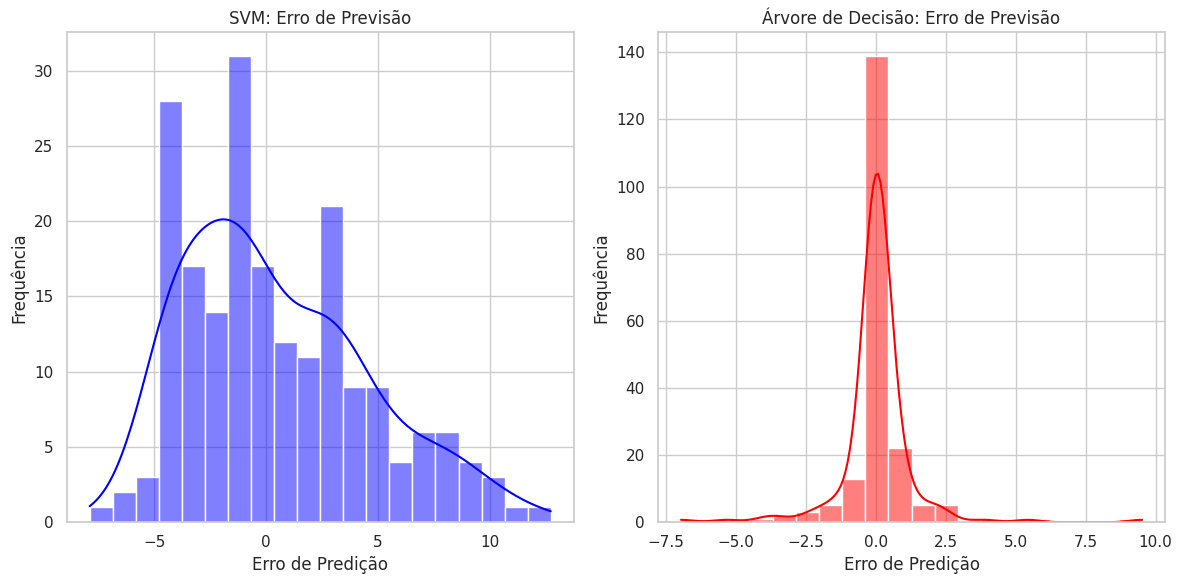

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Converter a coluna 'rating' para valores numéricos
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')

# Remover linhas com valores nulos na coluna 'rating'
df3.dropna(subset=['rating'], inplace=True)

# Separar os dados em features (x) e target (y)
x = df3.drop(['rating', 'rating_category'], axis=1)  # Features sem 'rating' e 'rating_category'
y = df3['rating']  # Target

# Dividir os dados em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inicializar e treinar o regressor SVM
svm_regressor = SVR()
svm_regressor.fit(x_train, y_train)

# Fazer previsões nos dados de teste usando SVM
y_pred_svm = svm_regressor.predict(x_test)

# Calcular o erro quadrático médio do SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)

# Inicializar e treinar o regressor Árvore de Decisão
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

# Fazer previsões nos dados de teste usando Árvore de Decisão
y_pred_dt = dt_regressor.predict(x_test)

# Calcular o erro quadrático médio da Árvore de Decisão
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Exibir as métricas para SVM e Árvore de Decisão
print("SVM Metrics:")
print(f"Mean Squared Error: {mse_svm:.4f}")

print("\nDecision Tree Metrics:")
print(f"Mean Squared Error: {mse_dt:.4f}")

# Visualização gráfica - Matriz de Confusão
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred_svm, bins=20, kde=True, color='blue')
plt.title('SVM: Erro de Previsão')
plt.xlabel('Erro de Predição')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_dt, bins=20, kde=True, color='red')
plt.title('Árvore de Decisão: Erro de Previsão')
plt.xlabel('Erro de Predição')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


# ***PCA/KNN/GradientBoost***

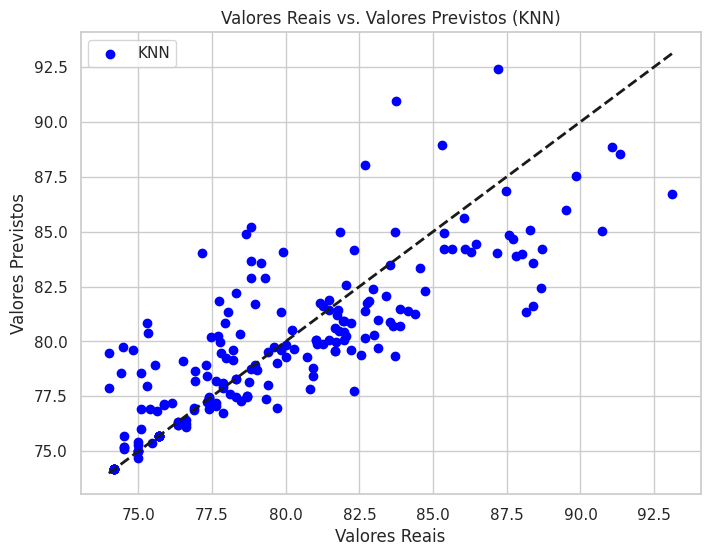

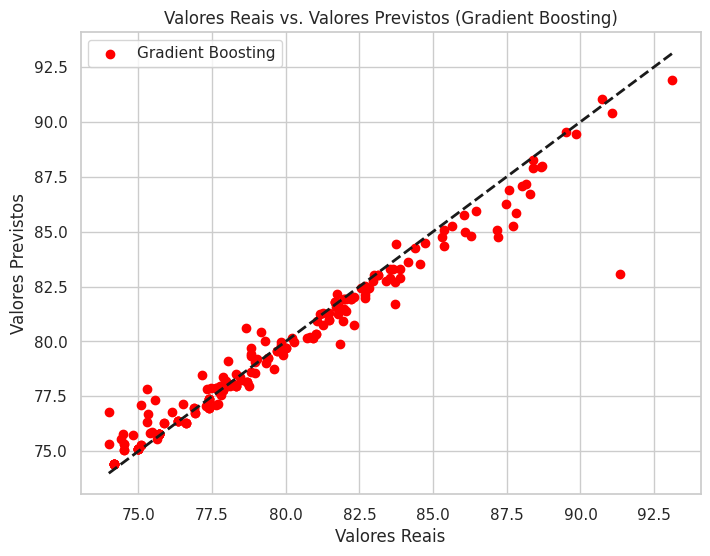

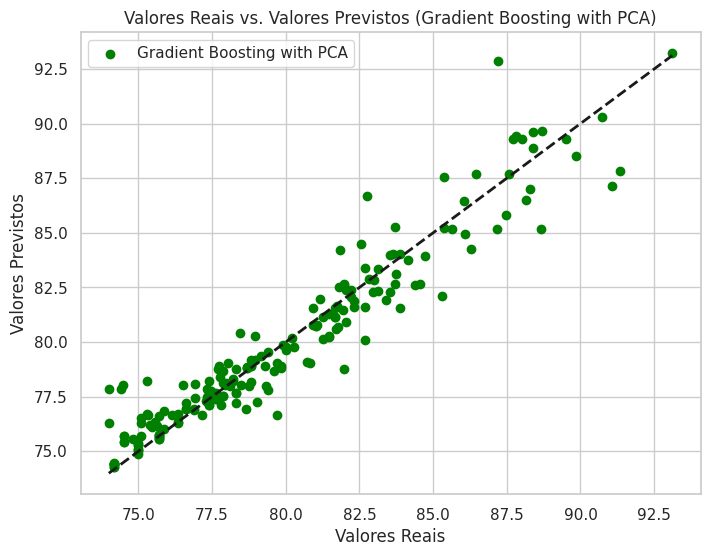

KNN Metrics:
Mean Squared Error: 6.3543

Gradient Boosting Metrics:
Mean Squared Error: 0.8912

Gradient Boosting with PCA Metrics:
Mean Squared Error: 1.5767


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error



# Converter a coluna 'rating' para valores numéricos
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')

# Remover linhas com valores nulos na coluna 'rating'
df3.dropna(subset=['rating'], inplace=True)

# Separar os dados em features (x) e target (y)
x = df3.drop(['rating', 'rating_category'], axis=1)  # Features sem 'rating' e 'rating_category'
y = df3['rating']  # Target

# Dividir os dados em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# KNN Regressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(x_train, y_train)

# Fazer previsões nos dados de teste usando KNN
y_pred_knn = knn_regressor.predict(x_test)

# Calcular o erro quadrático médio do KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Fazer previsões nos dados de teste usando Gradient Boosting Regressor
y_pred_gbr = gbr.predict(x_test)

# Calcular o erro quadrático médio do Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

# PCA
pca = PCA(n_components=4)  # Defina o número de componentes principais desejados
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Inicializar e treinar um regressor com os dados transformados pelo PCA (por exemplo, Gradient Boosting)
gbr_pca = GradientBoostingRegressor()
gbr_pca.fit(x_train_pca, y_train)

# Fazer previsões nos dados de teste usando Gradient Boosting com PCA
y_pred_gbr_pca = gbr_pca.predict(x_test_pca)

# Calcular o erro quadrático médio do Gradient Boosting Regressor com PCA
mse_gbr_pca = mean_squared_error(y_test, y_pred_gbr_pca)
import matplotlib.pyplot as plt

# Criar gráfico para KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', label='KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (KNN)')
plt.legend()
plt.show()

# Criar gráfico para Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, color='red', label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (Gradient Boosting)')
plt.legend()
plt.show()

# Criar gráfico para Gradient Boosting com PCA
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr_pca, color='green', label='Gradient Boosting with PCA')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (Gradient Boosting with PCA)')
plt.legend()
plt.show()


# Exibir as métricas para KNN, Gradient Boosting e Gradient Boosting com PCA
print("KNN Metrics:")
print(f"Mean Squared Error: {mse_knn:.4f}")

print("\nGradient Boosting Metrics:")
print(f"Mean Squared Error: {mse_gbr:.4f}")

print("\nGradient Boosting with PCA Metrics:")
print(f"Mean Squared Error: {mse_gbr_pca:.4f}")


# ***Análise de sentimento***

In [3]:
%%capture
!pip install stopwords
!pip install flair
!pip install nltk
!pip install swifter

In [4]:
import pandas as pd
import numpy as np
import flair
from flair.data import Sentence
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image

# Lista de comentários aleatórios sobre um jogo fictício
comentarios = [
    "Os gráficos são incríveis, mas a jogabilidade poderia ser melhor.",
    "Adoro a trilha sonora deste jogo!",
    "É viciante, não consigo parar de jogar.",
    "Os personagens são bem desenvolvidos, mas a história é um pouco fraca.",
    "Que jogo envolvente! A história é fascinante.",
    "Estou um pouco decepcionado com a falta de variedade de cenários.",
    "A mecânica de combate é ótima, mas os bugs são irritantes.",
    "Os efeitos sonoros são imersivos, me sinto dentro do jogo.",
    "Um dos melhores jogos que já joguei!",
    "A inteligência artificial dos inimigos precisa ser melhorada."
]

# Embaralhando os comentários para análise aleatória
rn.shuffle(comentarios)

# Criando um DataFrame com os comentários
data = pd.DataFrame({'Comentarios': comentarios})

# Inicializando o modelo Flair para análise de sentimento
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

# Função para analisar o sentimento de cada comentário
def analisar_sentimento(text):
    sentence = Sentence(text)
    flair_sentiment.predict(sentence)
    return sentence.labels[0].value, sentence.labels[0].score

# Aplicando a análise de sentimento aos comentários
data[['Sentimento', 'Confianca']] = data['Comentarios'].apply(analisar_sentimento).apply(pd.Series)

# Exibindo os resultados da análise de sentimento
print(data)


2023-11-27 01:31:20,387 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpsesmhqxr


100%|██████████| 253M/253M [00:11<00:00, 23.2MB/s]

2023-11-27 01:31:32,386 copying /tmp/tmpsesmhqxr to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-11-27 01:31:33,778 removing temp file /tmp/tmpsesmhqxr


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

                                         Comentarios Sentimento  Confianca
0  A inteligência artificial dos inimigos precisa...   NEGATIVE   0.999831
1            É viciante, não consigo parar de jogar.   NEGATIVE   0.976297
2      Que jogo envolvente! A história é fascinante.   POSITIVE   0.998740
3                  Adoro a trilha sonora deste jogo!   NEGATIVE   0.972171
4  Os personagens são bem desenvolvidos, mas a hi...   POSITIVE   0.572635
5  Estou um pouco decepcionado com a falta de var...   POSITIVE   0.577707
6  A mecânica de combate é ótima, mas os bugs são...   NEGATIVE   0.989647
7  Os gráficos são incríveis, mas a jogabilidade ...   POSITIVE   0.679433
8               Um dos melhores jogos que já joguei!   POSITIVE   0.936014
9  Os efeitos sonoros são imersivos, me sinto den...   NEGATIVE   0.794121


In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

                                          Comentarios Sentimento
0                Esse jogo é incrível, estou viciado!   POSITIVE
1   A história é envolvente e os gráficos são ótimos.   POSITIVE
2     Não gostei da jogabilidade, poderia ser melhor.   NEGATIVE
3            Os bugs constantes me frustram bastante.   NEGATIVE
4                  Adorei a trilha sonora deste jogo!   NEGATIVE
5                      A mecânica de combate é ótima.   NEGATIVE
6            Não recomendaria este jogo para ninguém.   POSITIVE
7   Estou impressionado com a inteligência artific...   NEGATIVE
8            A variedade de cenários é surpreendente.   POSITIVE
9                 Os loadings são demorados demais...   POSITIVE
10                  Os efeitos sonoros são imersivos!   POSITIVE
11                           Este jogo é um pesadelo.   POSITIVE
12                      Ótima experiência de imersão!   POSITIVE
13        Fiquei desapontado com a falta de inovação.   POSITIVE
14  Estou apaixonado por 

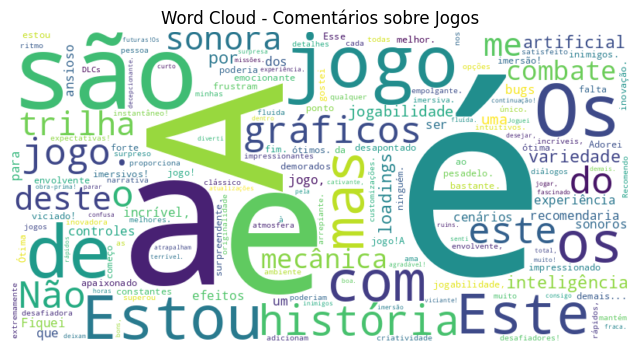

In [6]:
import pandas as pd
import numpy as np
import flair
from flair.data import Sentence
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Comentários sobre jogos
comentarios = [
    "Esse jogo é incrível, estou viciado!",
    "A história é envolvente e os gráficos são ótimos.",
    "Não gostei da jogabilidade, poderia ser melhor.",
    "Os bugs constantes me frustram bastante.",
    "Adorei a trilha sonora deste jogo!",
    "A mecânica de combate é ótima.",
    "Não recomendaria este jogo para ninguém.",
    "Estou impressionado com a inteligência artificial dos inimigos.",
    "A variedade de cenários é surpreendente.",
    "Os loadings são demorados demais...",
    "Os efeitos sonoros são imersivos!",
    "Este jogo é um pesadelo.",
    "Ótima experiência de imersão!",
    "Fiquei desapontado com a falta de inovação.",
    "Estou apaixonado por este jogo!"
    "A história é o ponto forte deste jogo, emocionante do começo ao fim.",
    "Os gráficos são impressionantes e a trilha sonora é arrepiante.",
    "A jogabilidade é fluida e os controles são intuitivos.",
    "Estou extremamente satisfeito com a variedade de opções e customizações.",
    "Este jogo superou todas as minhas expectativas!",
    "A inteligência artificial é desafiadora e proporciona uma experiência imersiva.",
    "Os detalhes nos cenários são incríveis, cada ambiente é único.",
    "Os loadings são rápidos, o que mantém o ritmo do jogo.",
    "A mecânica de combate é inovadora e empolgante.",
    "Os efeitos sonoros adicionam muito à atmosfera do jogo.",
    "A narrativa é envolvente, mas os diálogos poderiam ser melhores.",
    "Recomendo este jogo para qualquer pessoa que ama jogos desafiadores!",
    "Este jogo é um clássico instantâneo!",
    "Fiquei surpreso com a originalidade e criatividade deste jogo.",
    "Estou ansioso por DLCs e atualizações futuras!"
    "Os gráficos são bons, mas a história é fraca.",
    "A jogabilidade é confusa e os bugs atrapalham a experiência.",
    "Não consigo parar de jogar, é viciante!",
    "A trilha sonora é incrível, mas os controles são ruins.",
    "Este jogo é uma obra-prima!",
    "A inteligência artificial dos inimigos é terrível.",
    "Estou fascinado com a variedade de missões.",
    "Os loadings são rápidos e a mecânica de combate é fluída.",
    "Joguei por horas e me diverti muito!",
    "A imersão é total, me senti dentro do jogo.",
    "Não recomendaria este jogo, é decepcionante.",
    "Estou ansioso pela continuação!",
    "Os gráficos deixam a desejar, mas a jogabilidade é boa.",
    "A história é cativante, mas o jogo é curto demais.",
    "Este jogo é uma surpresa agradável!"
]

# Criando um DataFrame com os comentários
data = pd.DataFrame({'Comentarios': comentarios})

# Inicializando o modelo Flair para análise de sentimento
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

# Função para analisar o sentimento de cada comentário
def analisar_sentimento(text):
    sentence = Sentence(text)
    flair_sentiment.predict(sentence)
    return sentence.labels[0].value

# Aplicando a análise de sentimento aos comentários
data['Sentimento'] = data['Comentarios'].apply(analisar_sentimento)

# Exibindo os resultados da análise de sentimento
print(data)

# Criando um WordCloud
stop_words = set()
filtered_words = ' '.join(data['Comentarios']).split()

word_counter = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Visualizando o WordCloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Comentários sobre Jogos')
plt.show()


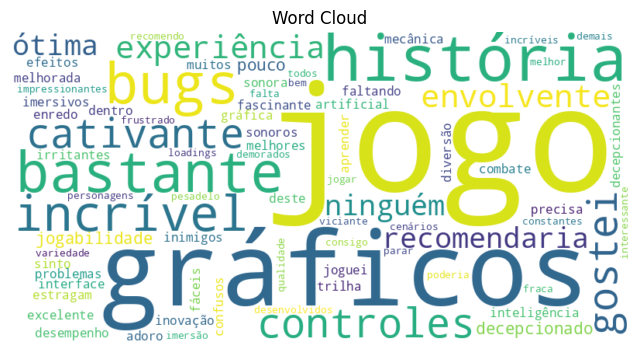

Matriz de Confusão:
[[1 3]
 [0 3]]

Acurácia: 0.5714285714285714

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
          -1       1.00      0.25      0.40         4

    accuracy                           0.57         7
   macro avg       0.75      0.62      0.53         7
weighted avg       0.79      0.57      0.51         7



In [8]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  # Adicionando esta importação
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Restante do seu código...


# Lista de comentários aleatórios sobre jogos
comentarios = [
    "Os gráficos são incríveis, mas a jogabilidade poderia ser melhor.",
    "Adoro a trilha sonora deste jogo!",
    "É viciante, não consigo parar de jogar.",
    "Os personagens são bem desenvolvidos, mas a história é um pouco fraca.",
    "Que jogo envolvente! A história é fascinante.",
    "Estou um pouco decepcionado com a falta de variedade de cenários.",
    "A mecânica de combate é ótima, mas os bugs são irritantes.",
    "Os efeitos sonoros são imersivos, me sinto dentro do jogo.",
    "Um dos melhores jogos que já joguei!",
    "A inteligência artificial dos inimigos precisa ser melhorada.",
    "Esse jogo é incrível!!! 😍",
    "Não gostei muito da interface gráfica... 😕",
    "Os controles são fáceis de aprender. 🎮",
    "Gráficos 10/10! 🌟",
    "Estou frustrado com os bugs constantes do jogo... 🐞",
    "A história é cativante e envolvente! 💫",
    "Não recomendaria este jogo a ninguém. 👎",
    "Os loadings são demorados demais... ⏳",
    "Ótima experiência de imersão! 🚀",
    "Esse jogo é um pesadelo! 😡",
    "Jogo bastante interessante!",
    "Muitos problemas de desempenho...",
    "Excelente enredo, mas gráficos decepcionantes.",
    "A jogabilidade é incrível!",
    "Está faltando inovação.",
    "Gostei bastante da experiência!",
    "A história é cativante, mas os bugs estragam a diversão.",
    "Os controles são confusos.",
    "Não recomendaria este jogo a ninguém!",
    "Incrível, recomendo a todos!",
    "Os gráficos são impressionantes!",
    "Bastante decepcionado com a qualidade."
]

# Embaralhando os comentários para análise aleatória
rn.shuffle(comentarios)

# Criando um DataFrame com os comentários
data = pd.DataFrame({'Comentarios': comentarios})

# Removendo caracteres especiais e normalizando para letras minúsculas
data['Comentarios'] = data['Comentarios'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Criando um WordCloud
stop_words = set(stopwords.words('portuguese'))  # Escolha o idioma apropriado
filtered_words = ' '.join(data['Comentarios']).split()
filtered_words = [word for word in filtered_words if word not in stop_words]

word_counter = ' '.join(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word_counter)

# Visualizando o WordCloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Preparando dados para análise de sentimento
X = data['Comentarios']
y = [1 if i < len(comentarios) // 2 else -1 for i in range(len(comentarios))]  # Marcando sentimentos positivos e negativos

# Vetorizando os dados
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Treinando um modelo Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(conf_matrix)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, predictions)
print("\nAcurácia:", accuracy)

# Relatório de Classificação
class_report = classification_report(y_test, predictions, labels=[1, -1])
print("\nRelatório de Classificação:")
print(class_report)
